### Дерунец Роман 20930, вариант 2

2.1. Вычислить выборочные характеристики (2 балла):
* выборочное среднее,
* выборочную дисперсию,
* несмещенную выборочную дисперсию,
* минимальную порядковую статистику,
* максимальную порядковую статистику,
* размах,
* медиану.
2.2. Построить (3 балла):
* график эмпирической функции распределения,
* гистограмму,
* ядерную оценку функции плотности.
2.3. Построить 99% - доверительный интервал (в предположении, что
выборка подчиняется нормальному распределению с неизвестными
параметрами) (3 балла)
* для математического ожидания
* для дисперсии
2.4. Проверить гипотезу о нормальном законе распределения (2 балла)
* по критерию Колмогорова или Хи-квадрат Пирсона  


Iris Setosa, Ширина
чашелистика

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as sps


def plot_emirical_cdf(sample):
    hist, edges = np.histogram(sample, bins=len(sample))
    y = hist.cumsum()
    y = y/50
    for i in range(len(y)):
        plt.plot([edges[i], edges[i+1]], [y[i], y[i]], c="red")
    plt.show()


df = pd.read_csv('Dataframe.csv', sep=' ')
df = df.drop(df[df.iris_species != 'setosa'].index)
# 2.1
print('№2')
sample_mean = (df['sepal_width'].sum()) / df.shape[0]
sample_variance = 0
for i in range(df.shape[0]):
    sample_variance += (sample_mean - df['sepal_width'][i])**2
sample_variance = sample_variance / df.shape[0]
unbiased_sample_variance = sample_variance * (df.shape[0] / (df.shape[0] - 1))
df = df.sort_values("sepal_width")  # Вариационный ряд
df = df.reset_index()
n = 0
p = df.shape[0] % 2
if p == 0:
    n = df.shape[0] / 2
else:
    n = df.shape[0] // 2 + 1
print("Пункт 2.1",
          "\nВыборочное средние", sample_mean,
          "\nВыборочная дисперсия", sample_variance,
          "\nНесмещенная выборочная дисперсия", unbiased_sample_variance,
          "\nМинимальная порядковая статистика", df['sepal_width'][0],
          "\nМаксимальная порядковая статистика", df['sepal_width'][df.shape[0]-1],
          "\nРазмах", df['sepal_width'][df.shape[0]-1] - df['sepal_width'][0],
          "\nМедиана", df['sepal_width'][n])

№2
Пункт 2.1 
Выборочное средние 3.428 
Выборочная дисперсия 0.14081600000000002 
Несмещенная выборочная дисперсия 0.14368979591836736 
Минимальная порядковая статистика 2.3 
Максимальная порядковая статистика 4.4 
Размах 2.1000000000000005 
Медиана 3.4


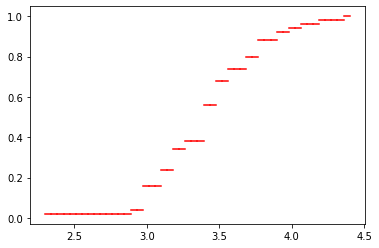

Валидационный ряд для графика эмпирической функции распределения:
[2.3, 2.9, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.1, 3.2, 3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 4.0, 4.1, 4.2, 4.4]


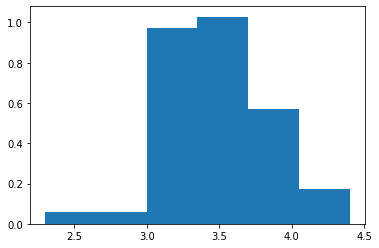

Данные для гистаграммы - значение и его количество в нашем входном списке:
{2.3: 1, 2.9: 1, 3.0: 6, 3.1: 4, 3.2: 5, 3.3: 2, 3.4: 9, 3.5: 6, 3.6: 3, 3.7: 3, 3.8: 4, 3.9: 2, 4.0: 1, 4.1: 1, 4.2: 1, 4.4: 1}


c:\program files (x86)\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


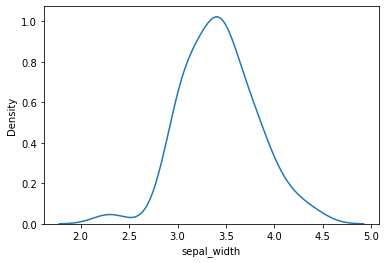

In [50]:
# print("Пункт 2.2")
sample = list(np.reshape(df['sepal_width'].values, -1, order='F'))
plot_emirical_cdf(sample)
print("Валидационный ряд для графика эмпирической функции распределения:")
print(sample)  # Валидационный ряд со значениями отcортированными по возрастанию

plt.hist(sample, density=True, bins=6)  # Гистаграма распределения
plt.show()

hist = {}                                            
buf = df['sepal_width'][0]                           
n = 1                                                
for i in range(1, df['sepal_width'].shape[0]):      
    if df['sepal_width'][i] == buf:
        n += 1
    else:
        hist[buf] = n
        buf = df['sepal_width'][i]
        n = 1
    if i == df['sepal_width'].shape[0] - 1:
        hist[buf] = n
print("Данные для гистаграммы - значение и его количество в нашем входном списке:")
print(hist)

sb.distplot(df['sepal_width'], hist=False)  # Ядерная(kernel) оценка функции плотности
plt.show()

In [51]:
print('Пункт 2.3')
u = 2.57    # Из таблицы Стьюдента
n = (u*sample_variance)/(df.shape[0])**0.5    # Формула из лекции для нахождения доверительного интервала мат. ожидания при известной дисперсии
# Для получения более точного ответа, воспользуемся таблицей распределения хи квадрата из интернета
expected_value = sample_variance * df.shape[0]     # Это из формулы поиска доверительного интервала для дисперсии при известном мат. ожидании
q1 = 76.15    # Данные из таблицы распределения Хи-квадрата
q2 = 29.71
print("Доверительный интервал для мат. ожидания ищем по формуле через известную нам дисперсию")
print("А вот доверительный интервал для дисперсии ищем по формуле через известное выборочное среднее")
print('99% доверительный интервал для мат. ожидания - [', sample_mean-n, ';', sample_mean+n, ']',
          '\n99% доверительный интервал для дисперсии - [', expected_value/q1, ';', expected_value/q2, ']')

Пункт 2.3
Доверительный интервал для мат. ожидания ищем по формуле через известную нам дисперсию
А вот доверительный интервал для дисперсии ищем по формуле через известное выборочное среднее
99% доверительный интервал для мат. ожидания - [ 3.3768200184712236 ; 3.4791799815287763 ] 
99% доверительный интервал для дисперсии - [ 0.0924596191726855 ; 0.23698418041063618 ]


In [52]:
print("Пункт 2.4")
# По критерию хи-квадрат, alpha 0.05
x = df['sepal_width']
d_plus = 0
for i, x_1 in enumerate(x):
    d_plus = max(d_plus, (i + 1) / len(x) - scipy.stats.norm(loc=sample_mean, scale=sample_variance).cdf(x_1))

    d_minus = 0
for i, x_1 in enumerate(x):
    d_minus = max(d_minus, sps.norm(loc=sample_mean, scale=sample_variance).cdf(x_1) - i / len(x))
if (6 * len(x) * max(d_minus, d_plus) + 1) / (6 * np.sqrt(len(x))) <= 0.9042:
        print("Распределение можно считать нормальным на уровне значимости 0.05")
else:
        print("Распределение не является нормальным")

Пункт 2.4
Распределение не является нормальным


In [53]:
# 2.4
print("Пункт 2.4")
# Воспользуемся тут критерием Колмогорова, alpha = 0.01, значение из таблицы t=s:
t = 1.0599
# Далее найдём наибольшее отклонение и вычислим значение критерия
fx = [0.02, 0.04, 0.16, 0.24, 0.34, 0.38, 0.56, 0.68, 0.74, 0.8, 0.88, 0.92, 0.94, 0.96, 0.98, 1]
# С помощью функции Лапласа, где значение справа равно Ф(((x[i] - x(выб. ср)))/s(Выб. исправленное ср. кв. откл.)) 
f_x = [0.0062, 0.1841, 0.2743, 0.3557, 0.4602, 0.5596, 0.6628, 0.7549, 0.8315, 0.8883, 0.9319, 0.9608, 0.9783, 0.9893, 0.9948, 0.99865]
lamba = []
for i in range(len(fx)):
    if fx[i] > f_x[i]:
        lamba.append((fx[i] - f_x[i]))
    else:
        lamba.append(f_x[i] - fx[i])
print("Найдём наибольшее отклонение, затем сравниваем его с нашим значением критерия Колмагорова:")
print("F*(x)    F(x)    |F(x) - F*(x)|")
for i in range(len(fx)):
    print(f'{f_x[i]:.4f}', " ", f'{fx[i]:.2f}', "    ", f'{lamba[i]:.4f}')
maxi = max(lamba)*(50**0.5)   # Умножаем на корень количества всех символов
print("Получается, что lambda = ", f'{maxi:.4f}')
if maxi < t:
    print("Так как", f'{maxi:.4f}', "<", t,", то распределение можно считать нормальным на уровне значимости 0.01")
else:
    print("Так как", f'{maxi:.4f}', ">", t,", то распределение не является нормальным")

Пункт 2.4
Найдём наибольшее отклонение, затем сравниваем его с нашим значением критерия Колмагорова:
F*(x)    F(x)    |F(x) - F*(x)|
0.0062   0.02      0.0138
0.1841   0.04      0.1441
0.2743   0.16      0.1143
0.3557   0.24      0.1157
0.4602   0.34      0.1202
0.5596   0.38      0.1796
0.6628   0.56      0.1028
0.7549   0.68      0.0749
0.8315   0.74      0.0915
0.8883   0.80      0.0883
0.9319   0.88      0.0519
0.9608   0.92      0.0408
0.9783   0.94      0.0383
0.9893   0.96      0.0293
0.9948   0.98      0.0148
0.9987   1.00      0.0013
Получается, что lambda =  1.2700
Так как 1.2700 > 1.0599 , то распределение не является нормальным
